# Eye blinking prediction

## 1. Problem Description

> Eye state detection is the task of predicting the state of eye whether it is open or closed. To achieve this task, a new trend of using brain activity signals by the mean of electroencephalography (EEG) measures for the training and testing of various machine learning classification algorithms was investigated by many researchers.

> The task of predicting human actions via brain signals takes high importance and usability in various fields such as computer games, health care and bio-medical systems, emotion tracking, smart home device controlling and internet of things, military, and detection of car driving drowsiness.

> An Emotiv headset device with 14 sensors has been used to record brain signals. The duration time of each recording was 117 seconds. Then, the different eye states observed during each recording were manually added. Each data point consists of 14 EEG features and an eye-state class (either 0 for open, or 1 for closed).

> The dataset was created by Rösler and Suendermann, which was firstly used by them in "O. Rösler and D. Suendermann, A first step towards eye state prediction using EEG, Proc. of the AIHLS, 2013"

## 2. Data Overview

In [1]:
%matplotlib inline
import pandas as pd


<img src="./images/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="./images/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [2]:
trainset = pd.read_csv("./data/eeg_train.csv")

In [3]:
trainset.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4299.49  3997.44  4277.95  4116.92  4353.85  4623.08  4100.00  4623.59   
1  4302.05  3985.64  4261.03  4129.74  4334.36  4615.38  4072.31  4585.64   
2  4321.03  4015.90  4265.13  4122.56  4333.33  4613.33  4072.82  4602.05   
3  4408.21  4104.10  4380.00  4232.31  4449.74  4750.26  4169.23  4731.28   
4  4347.18  3975.38  4266.67  4102.56  4333.33  4617.95  4097.44  4612.82   

        P8       T8      FC6       F4       F8      AF4  label  
0  4202.56  4229.23  4211.79  4278.97  4600.00  4369.23      1  
1  4192.31  4225.13  4195.90  4283.08  4607.18  4358.46      0  
2  4192.31  4223.08  4155.38  4286.15  4608.21  4371.79      0  
3  4311.28  4352.31  4319.49  4388.21  4715.90  4464.10      0  
4  4210.77  4240.51  4248.21  4313.33  4664.10  4411.79      1

In [4]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

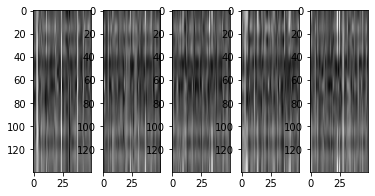

In [5]:
scaler = MinMaxScaler()
trainset_img = scaler.fit_transform(trainset).T * 255

inc = 50

im0 = PIL.Image.fromarray(trainset_img[:-1,0:inc])
im0 = im0.resize((5*10,14*10), PIL.Image.ANTIALIAS)
im1 = PIL.Image.fromarray(trainset_img[:-1,inc:2*inc])
im1 = im1.resize((5*10,14*10), PIL.Image.ANTIALIAS)
im2 = PIL.Image.fromarray(trainset_img[:-1,2*inc:3*inc])
im2 = im2.resize((5*10,14*10), PIL.Image.ANTIALIAS)
im3 = PIL.Image.fromarray(trainset_img[:-1,3*inc:4*inc])
im3 = im3.resize((5*10,14*10), PIL.Image.ANTIALIAS)
im4 = PIL.Image.fromarray(trainset_img[:-1,4*inc:5*inc])
im4 = im4.resize((5*10,14*10), PIL.Image.ANTIALIAS)

f, axarr = plt.subplots(nrows=1,ncols=5)
axarr[0].imshow(im0)
axarr[1].imshow(im1)
axarr[2].imshow(im2)
axarr[3].imshow(im3)
axarr[4].imshow(im4)

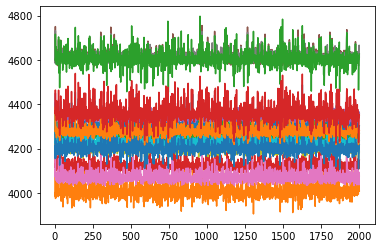

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, len(trainset), len(trainset)), trainset[trainset.columns[:-1]])

In [9]:
from scipy.stats import pearsonr
import seaborn as sns

/home/mgh/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mgh/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mgh/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

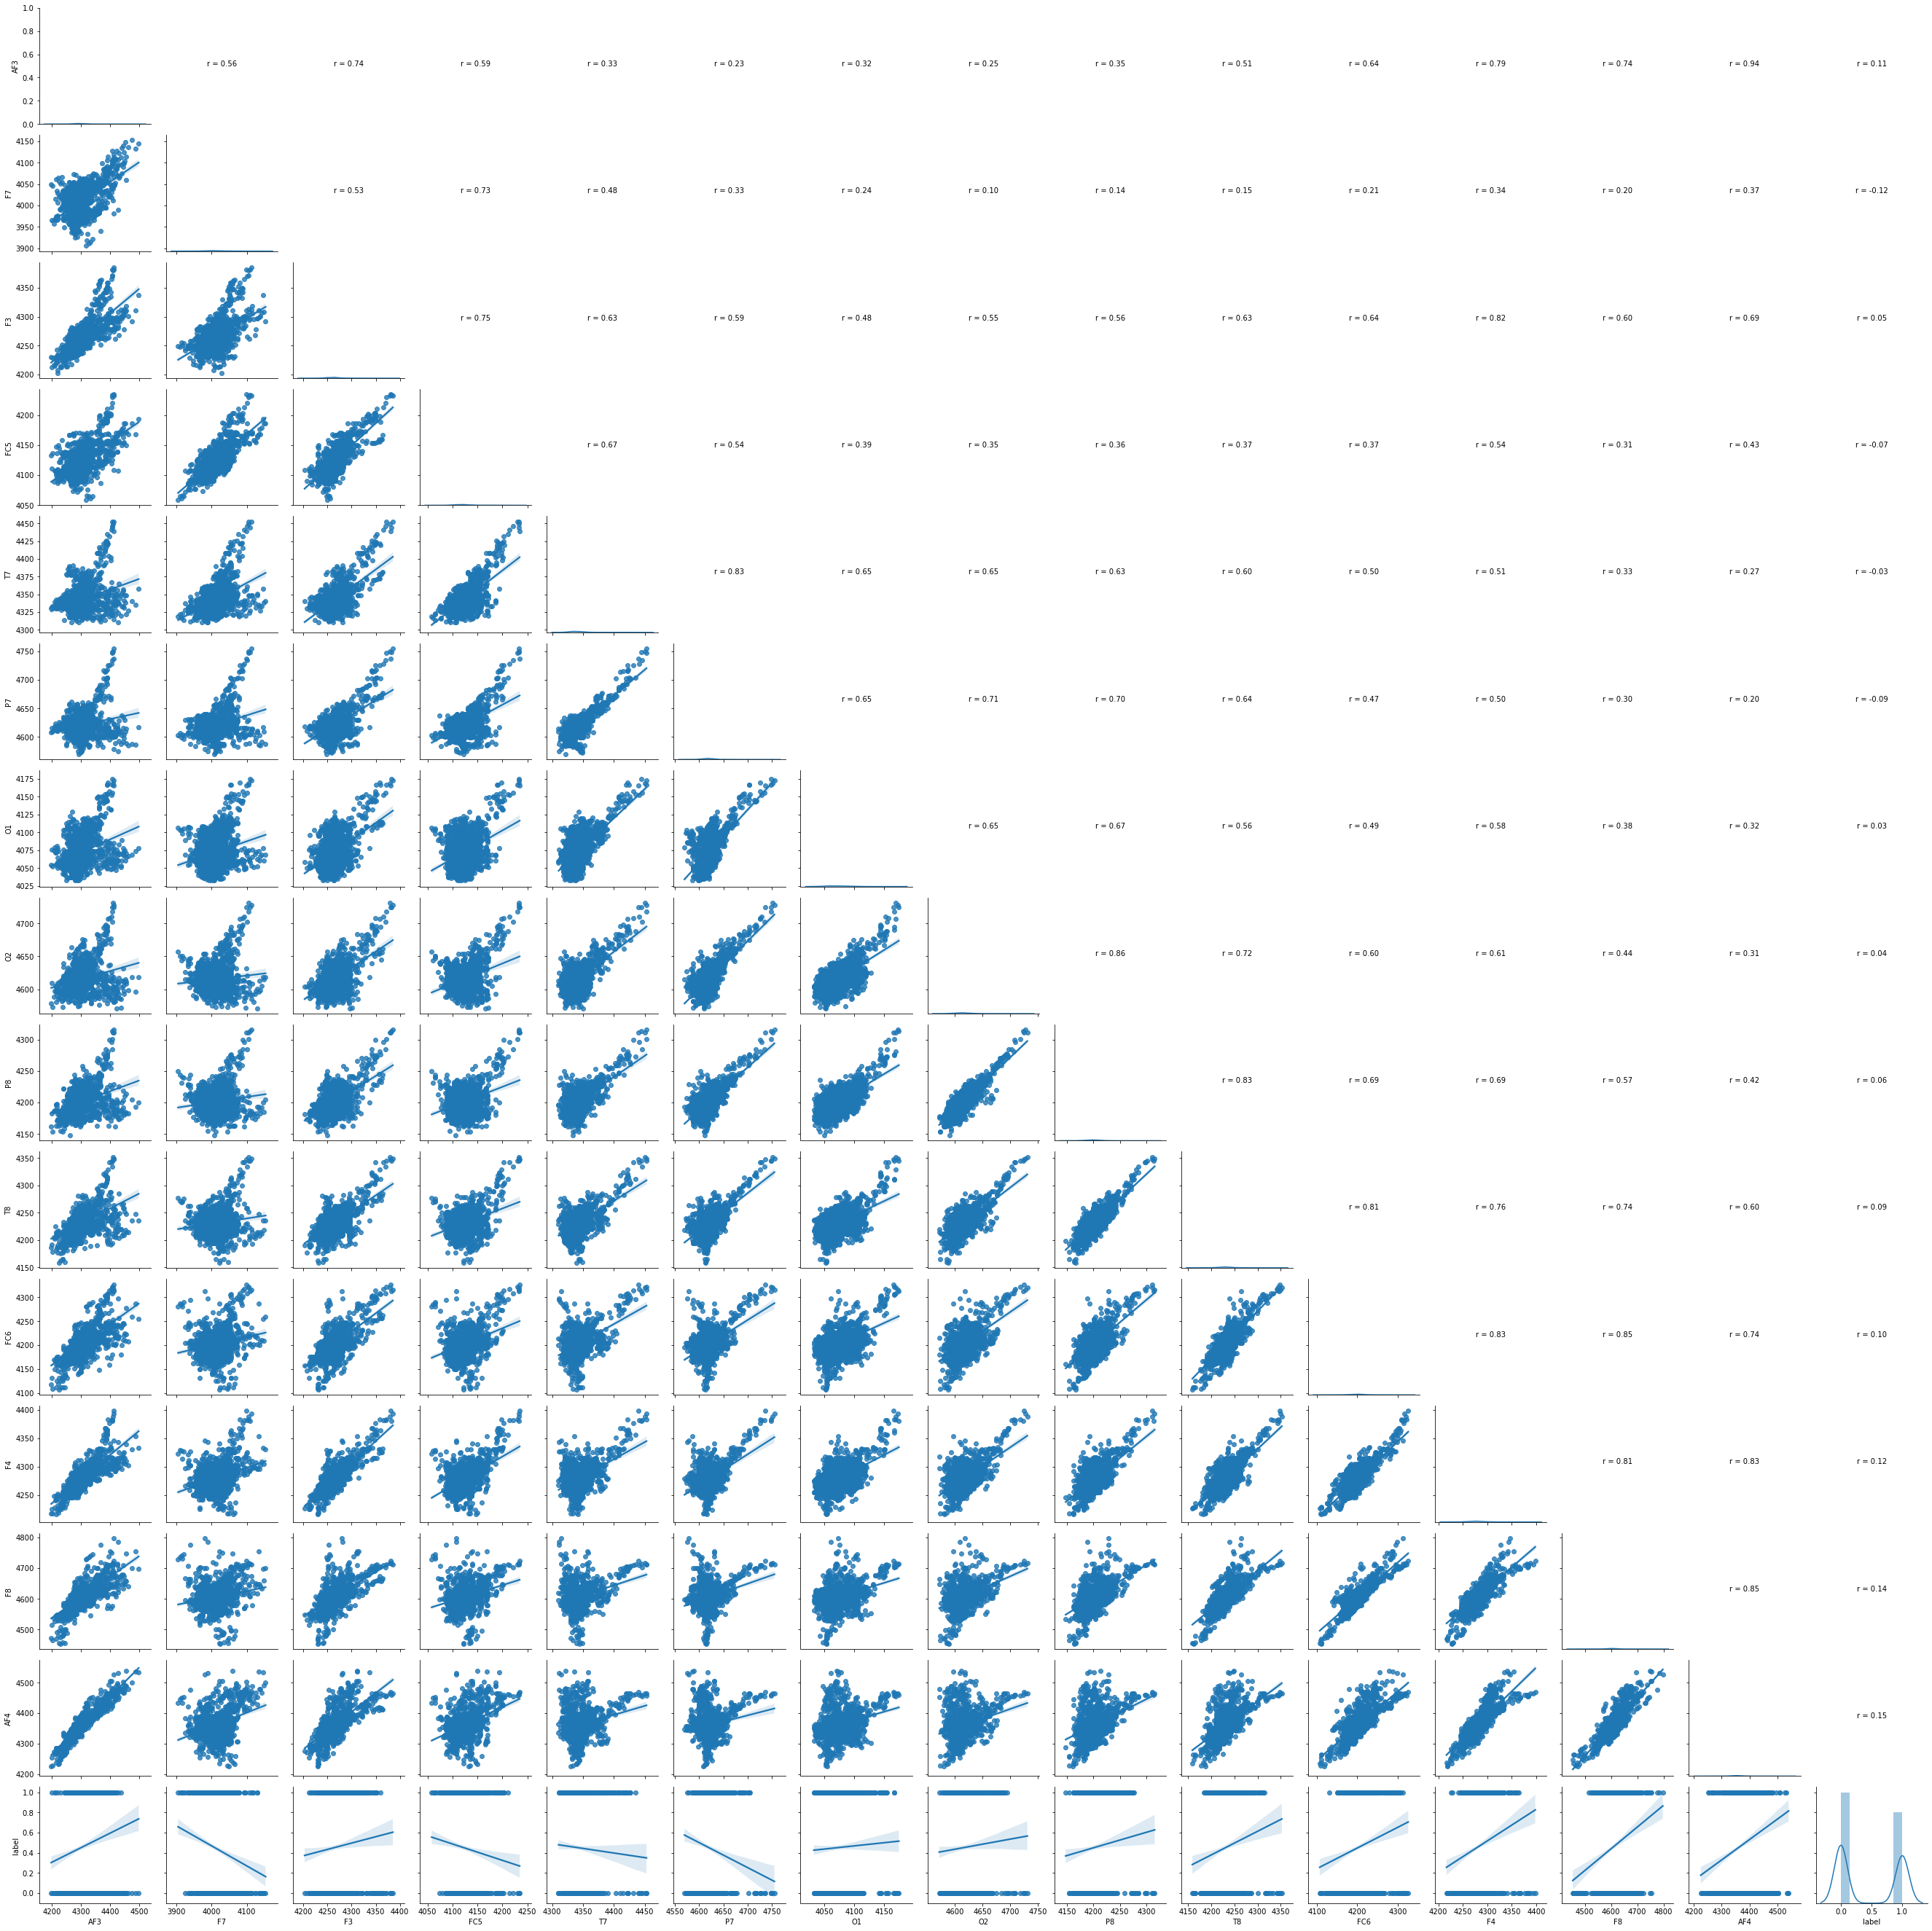

In [10]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(trainset)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

<AxesSubplot:>

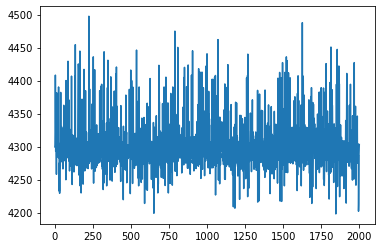

In [4]:
trainset['AF3'].plot()

In [5]:
trainset.shape

(2000, 15)

In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     2000 non-null   float64
 1   F7      2000 non-null   float64
 2   F3      2000 non-null   float64
 3   FC5     2000 non-null   float64
 4   T7      2000 non-null   float64
 5   P7      2000 non-null   float64
 6   O1      2000 non-null   float64
 7   O2      2000 non-null   float64
 8   P8      2000 non-null   float64
 9   T8      2000 non-null   float64
 10  FC6     2000 non-null   float64
 11  F4      2000 non-null   float64
 12  F8      2000 non-null   float64
 13  AF4     2000 non-null   float64
 14  label   2000 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 234.5 KB


In [7]:
trainset.describe()

AF3           F7           F3          FC5           T7  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean   4300.157125  4009.273150  4263.860860  4122.616195  4341.606870   
std      36.361719    29.853264    20.788323    20.565528    16.691038   
min    4197.950000  3905.640000  4202.560000  4058.460000  4310.260000   
25%    4280.510000  3990.770000  4250.260000  4108.720000  4331.790000   
50%    4293.330000  4006.150000  4262.560000  4121.030000  4338.460000   
75%    4309.740000  4023.590000  4270.260000  4133.460000  4347.180000   
max    4497.440000  4152.820000  4385.640000  4234.360000  4452.820000   

                P7           O1           O2           P8           T8  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean   4620.061720  4072.151250  4615.229300  4200.893915  4230.573235   
std      18.034865    20.933632    18.391027    17.810272    19.661149   
min    4569.740000  4032.820000  4571.280000  4147.690000  4158.970000   
25%    4611.790000  4057.440000  4604.100000  4190.260000  4219.490000   
50%    4617.950000  4069.740000  4612.820000  4199.490000  4228.720000   
75%    4626.150000  4083.590000  4623.080000  4209.230000  4238.970000   
max    4754.870000  4174.870000  4731.280000  4315.380000  4352.310000   

               FC6           F4           F8          AF4        label  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   4201.583060  4278.445325  4605.169335  4359.852780     0.450500  
std      24.397269    19.645651    33.067591    37.074555     0.497668  
min    4107.180000  4216.410000  4454.360000  4225.640000     0.000000  
25%    4189.740000  4267.180000  4590.642500  4342.050000     0.000000  
50%    4200.000000  4276.410000  4603.080000  4354.360000     0.000000  
75%    4211.280000  4286.150000  4617.950000  4371.790000     1.000000  
max    4325.640000  4397.950000  4796.920000  4538.970000     1.000000

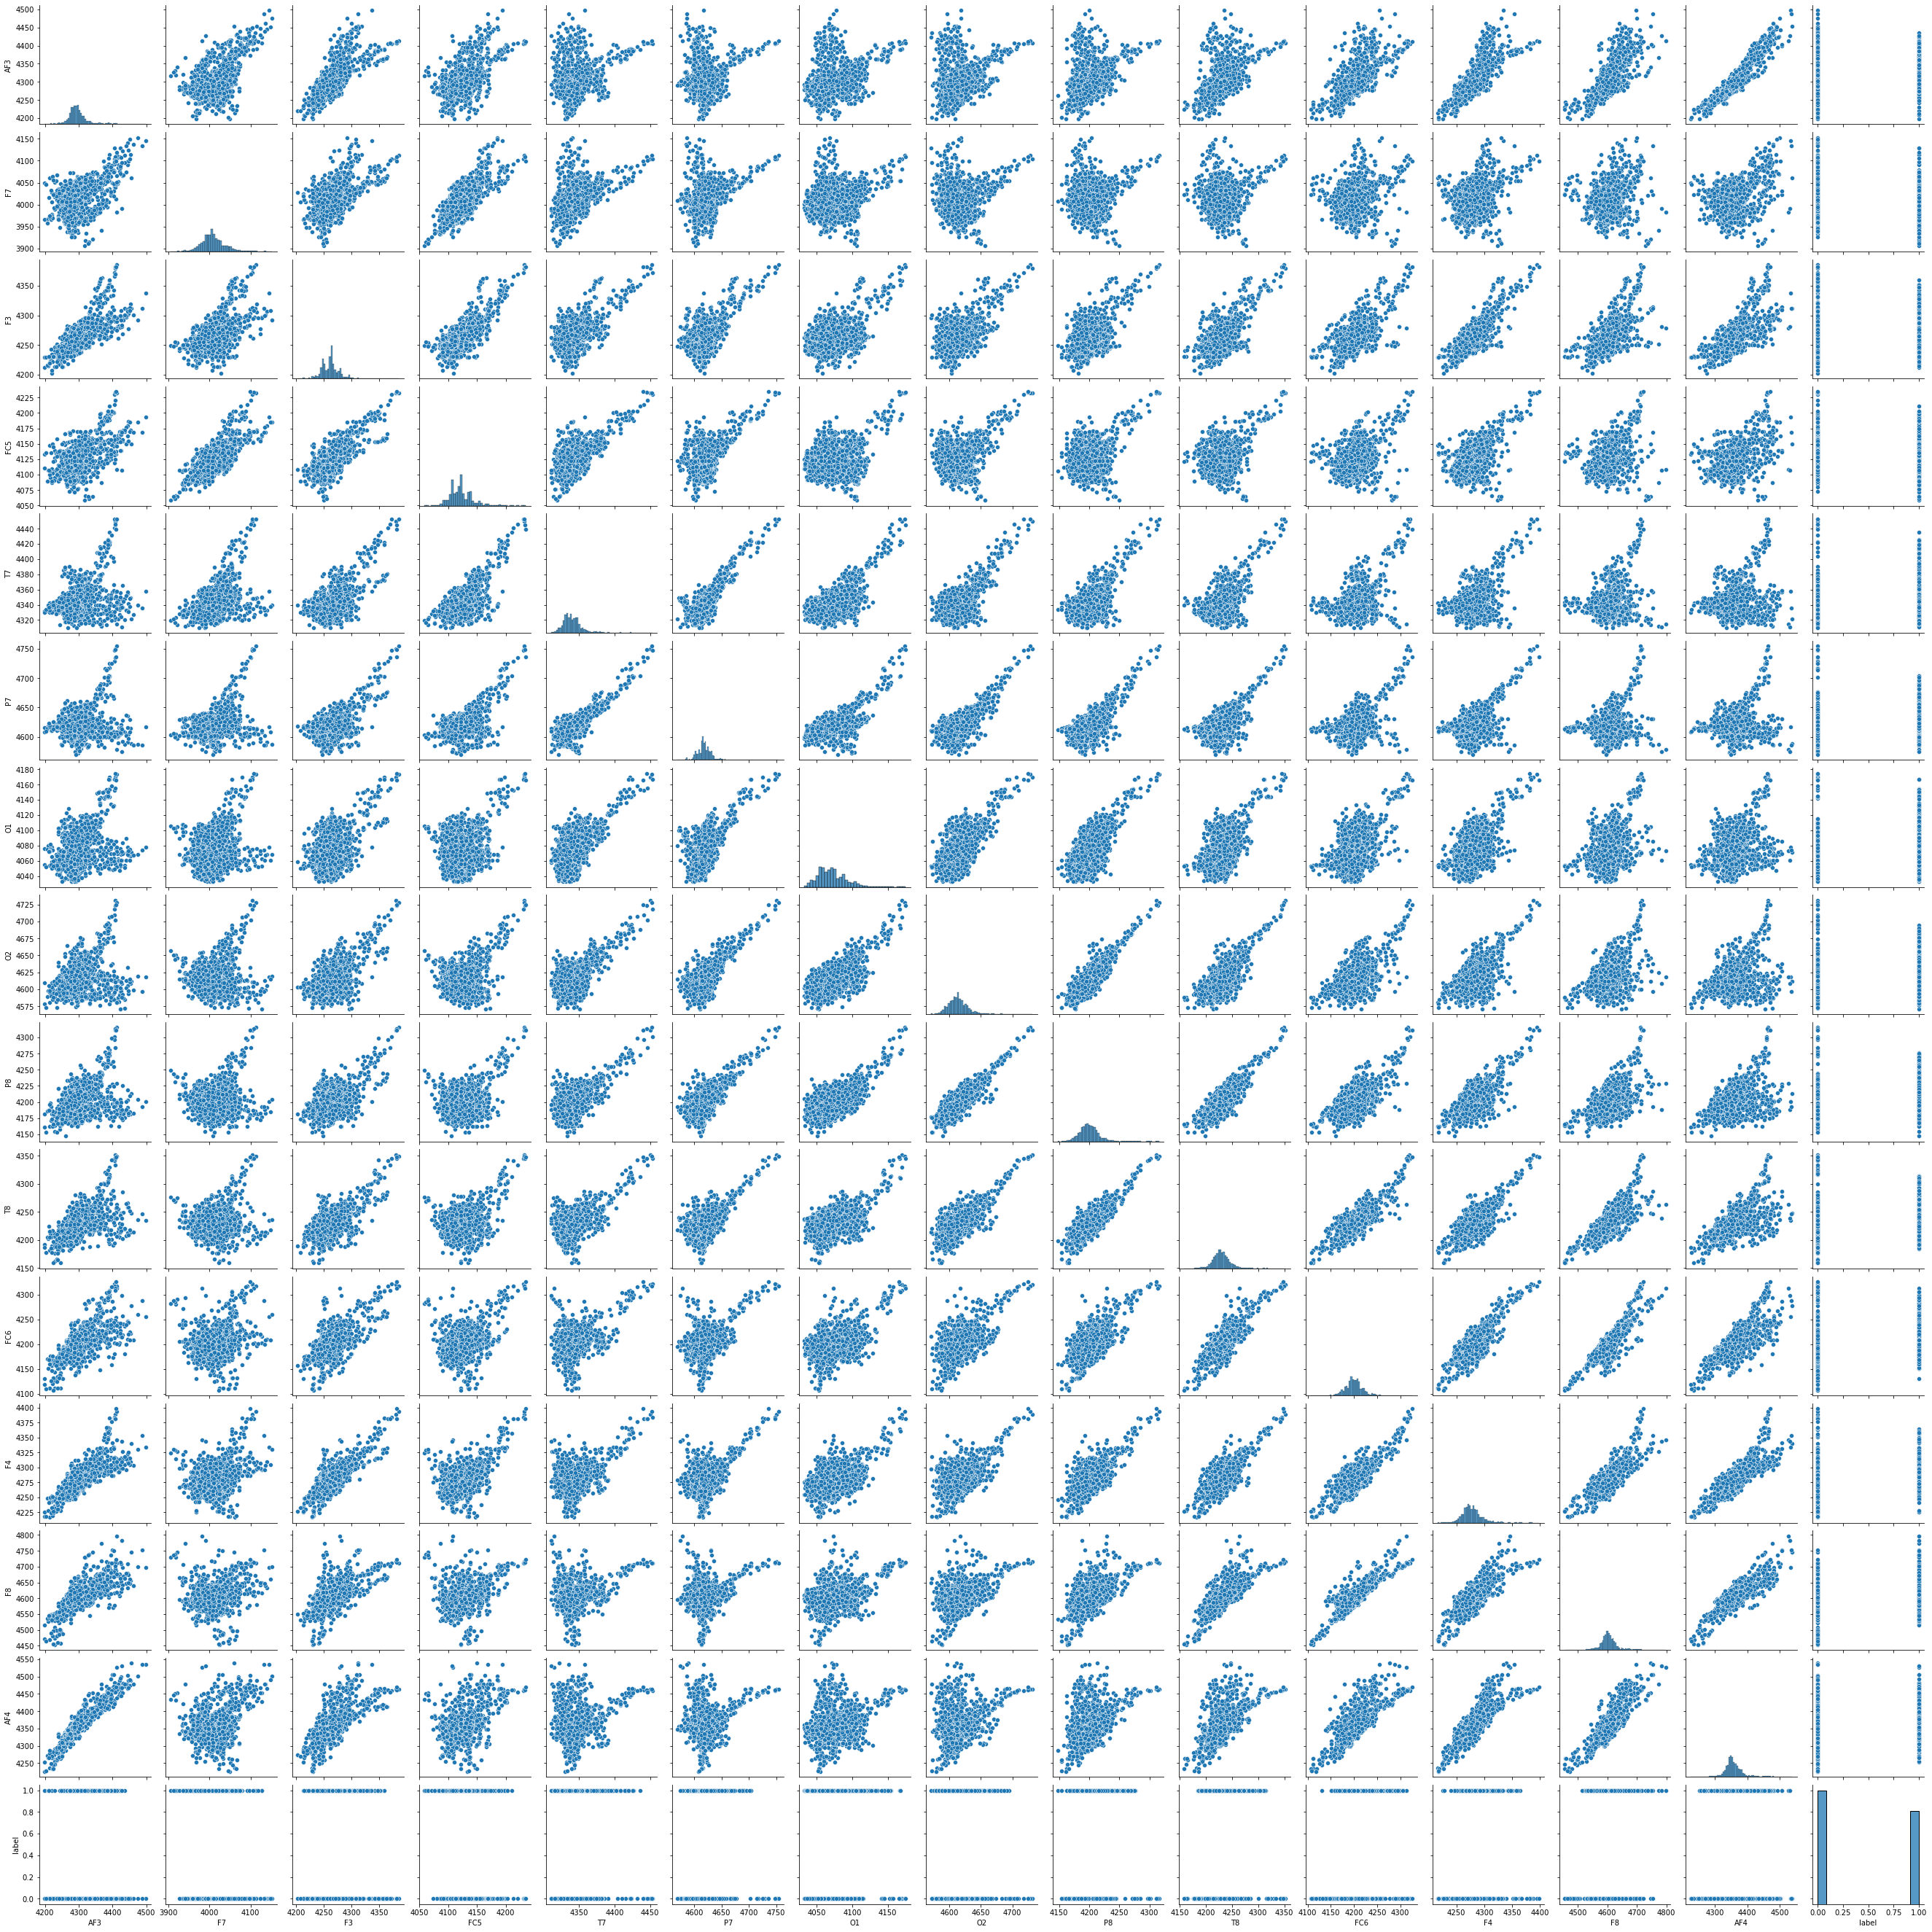

In [8]:
import seaborn as sns
sns.pairplot(trainset)

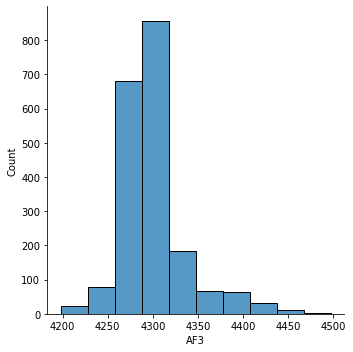

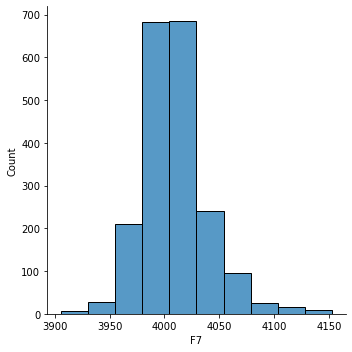

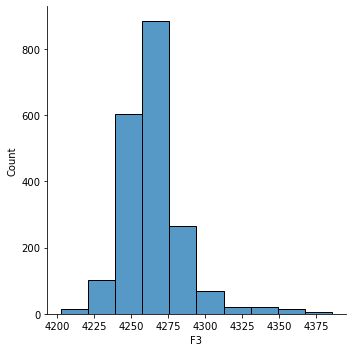

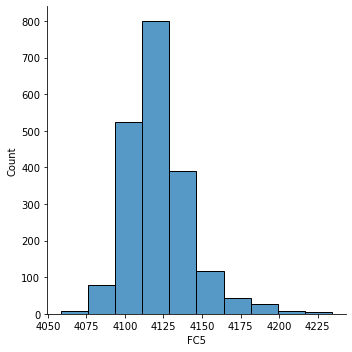

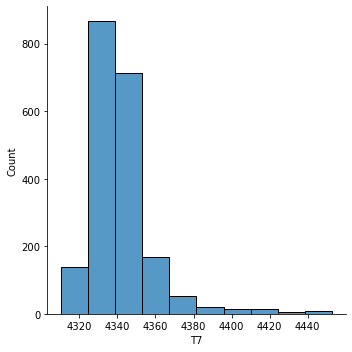

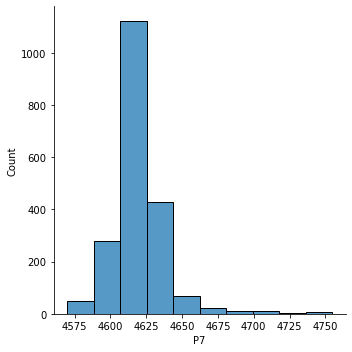

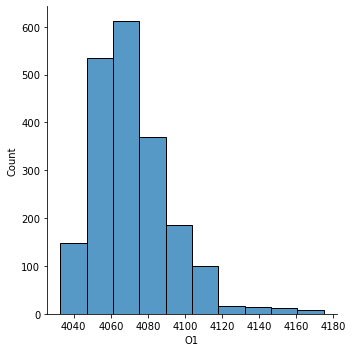

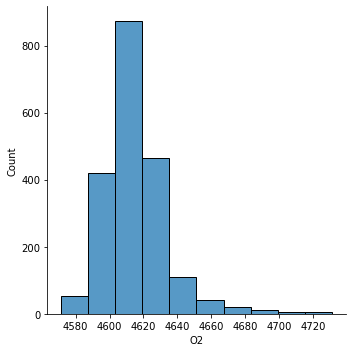

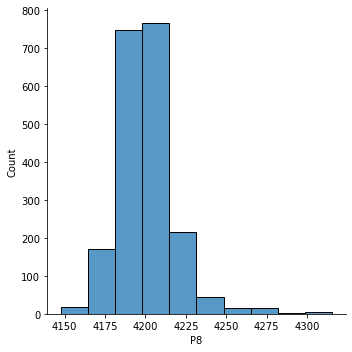

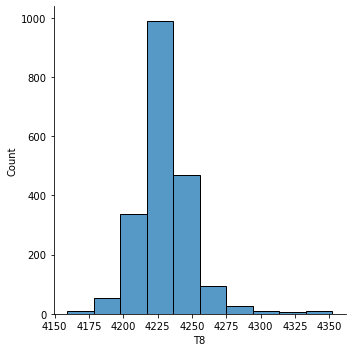

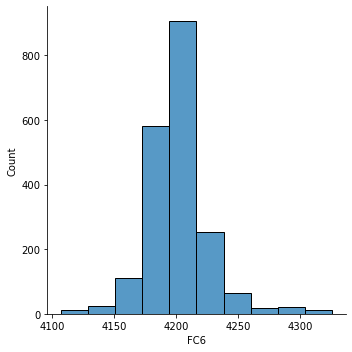

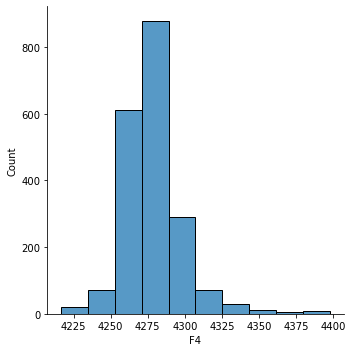

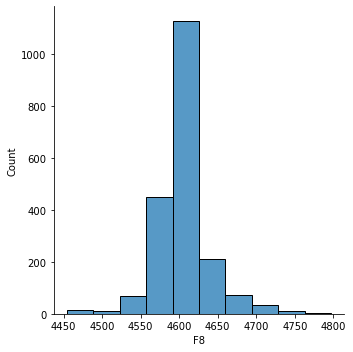

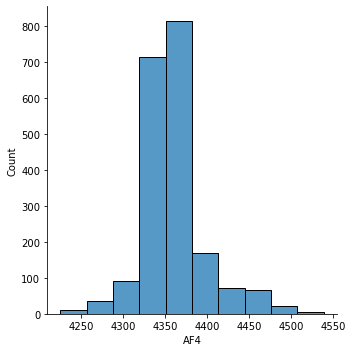

In [9]:
import matplotlib.pyplot as plt

n_rows=1
n_cols=len(trainset.columns)

for column in trainset.columns[:-1]:
    sns.displot(trainset[column], bins=10)

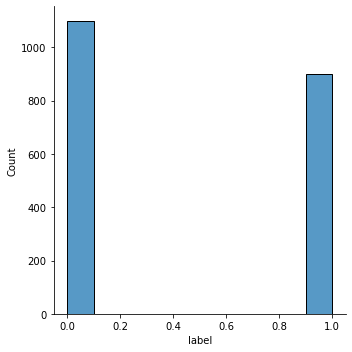

In [10]:
sns.displot(trainset[trainset.columns[-1]], bins=10)

<AxesSubplot:xlabel='label', ylabel='count'>

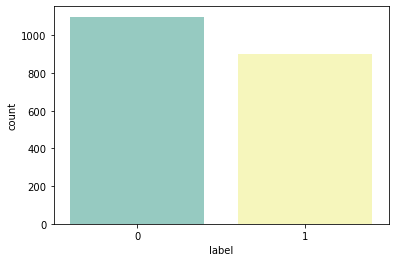

In [11]:
sns.countplot(x='label', data=trainset, palette="Set3")

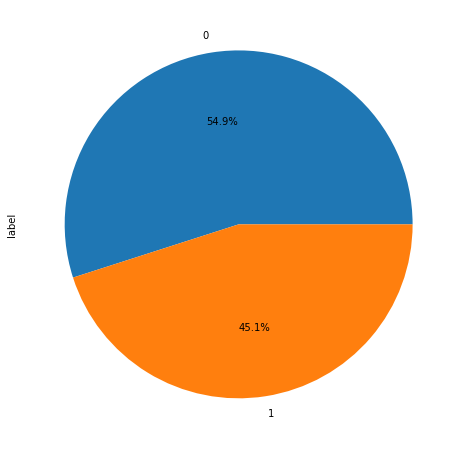

In [12]:
plt.figure(figsize=(8,8))
trainset['label'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

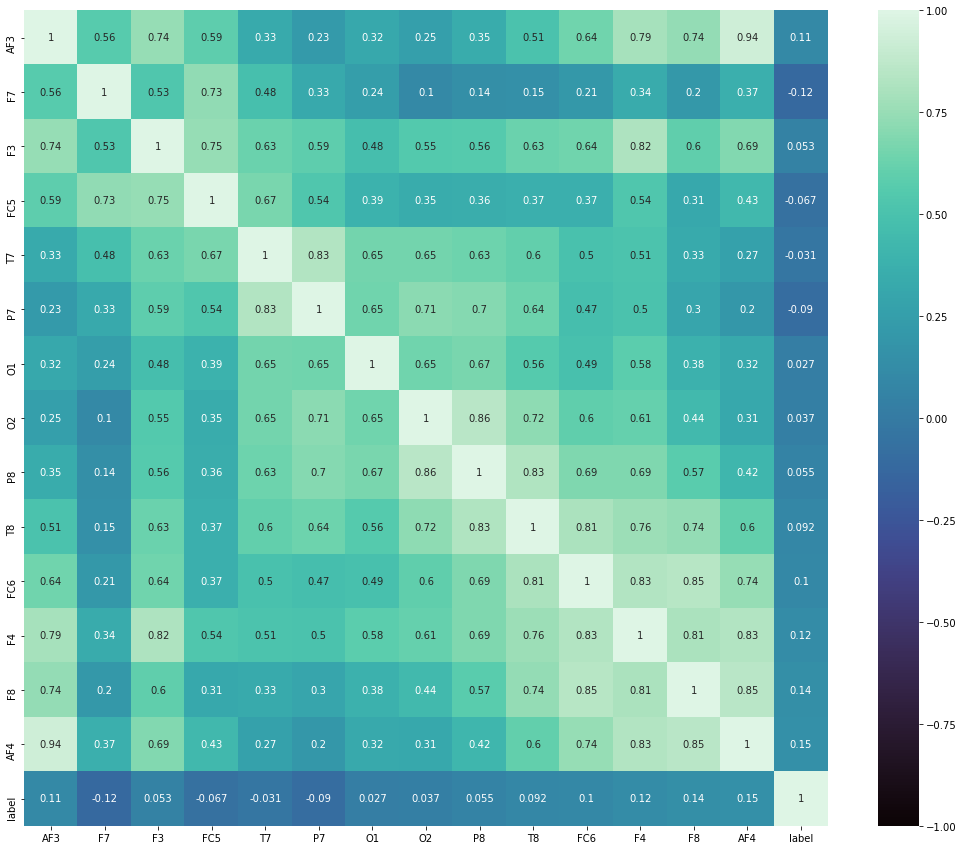

In [13]:
corr=trainset.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show

Looking for Nulls:

In [14]:
trainset.isnull().sum()

AF3      0
F7       0
F3       0
FC5      0
T7       0
P7       0
O1       0
O2       0
P8       0
T8       0
FC6      0
F4       0
F8       0
AF4      0
label    0
dtype: int64

In [15]:
trainset.isna().sum()

AF3      0
F7       0
F3       0
FC5      0
T7       0
P7       0
O1       0
O2       0
P8       0
T8       0
FC6      0
F4       0
F8       0
AF4      0
label    0
dtype: int64

In [16]:
print("Missing values:", trainset.isna().sum().sum())

Missing values: 0


Check whether the data is imbalance or not

In [17]:
trainset['label'].value_counts()

0    1099
1     901
Name: label, dtype: int64

Looking if we have non-numeric values or not

In [18]:
print("Non-Numeric columns:", len(trainset.select_dtypes('object').columns))

Non-Numeric columns: 0


## 3. Data Pre-Processing

The only pre-processing required is *scaling* the features. The procedure is as follows:
1. Split the `trainset` into the `train` and `validation` sets.
```python
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)
```
2. Fit the scaling function to the `train` set
```python
>>> from sklearn import preprocessing
>>> min_max_scaler = preprocessing.MinMaxScaler()
>>> X_train = min_max_scaler.fit_transform(X_train)
>>> X_train = pd.DataFrame(X_train, columns=trainset.columns[:-1])
```
3. Transform the fit function to the `validation` set.
```python
>>> X_val = min_max_scaler.transform(X_val)
>>> X_val = pd.DataFrame(X_val, columns=trainset.columns[:-1])
```
> **Note:** To avoid data leakage, we do not use validation in step 2.

Instead, we are using pipeline to simplify the codes. Using the Pipeline, we mix the preprocessing the model creating steps.

**Does my sklearn pipeline also scale my dependent variables y?** 

Suppose my code is
```python
>>> pipe=Pipeline([('sc',StandardScaler()),
               ('pca',PCA(n_components=2)),
               ('lr',LinearRegression())])
```
and I called `pipe.fit(X_train,y_train)`. Does this also scale the `y_train` values?
    
*Answer:* 

No, it does not. `Pipeline` sequentially applies the `fit` method and then the `transform` method to each of the steps, except for the last one, which only needs the `fit` method. Your first two classes in the pipeline are `StandardScaler` and `PCA`, and both of them apply the `fit` method ignoring the `y_train` values, therefore, they only depend on the `X_train` data. For the final step, `LinearRegression` will receive the transformed `X_train` values, and will call the `fit` method with them, but also with the original `y_train` values.

> Also, the pipeline `scaler` section **won't** change the original `X_train`.

## 4. Building The Model Using Pipeline

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(trainset[trainset.columns[:-1]], trainset[trainset.columns[-1]],
                                                  test_size=0.2, random_state=27)

### Using GridSearchCV

Without gridsearch, the codes are looking like this:

```python
>>> pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dt_clf', DecisionTreeClassifier()),
])

>>> pipeline.fit(X_train, y_train)

>>> y_val_pred_dt = pipeline.predict(X_val)
>>> y_train_pred_dt = pipeline.predict(X_train)

>>> pipeline.score(X_val, y_val), pipeline.score(X_train, y_train)
```

However, here we use GridSearchCV to obtain the best hyper parameters for each method.

**Note:** 
- A list of parameters for for each classifier that can be used in `GridSearch` can be found from `.get_params()` method.
- The best (optimal) parameters can be obtained from `cv.best_params_` method.
- We can then use `cv.best_estimator_` to make future predictions:
```python
>>> y_test = cv.best_estimator_.predict(X_test)
```

### Decision Tree

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [22]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dt_clf', DecisionTreeClassifier()),
])

In [23]:
parameters = {
    'dt_clf__criterion': ['gini', 'entropy'],
    'dt_clf__max_depth': [2, 4, 6, 8, 10, 12]
}

In [24]:
cv = GridSearchCV(pipeline, param_grid=parameters)

In [25]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('dt_clf', DecisionTreeClassifier())]),
             param_grid={'dt_clf__criterion': ['gini', 'entropy'],
                         'dt_clf__max_depth': [2, 4, 6, 8, 10, 12]})

In [26]:
y_val_pred_dt = cv.predict(X_val)
y_train_pred_dt = cv.predict(X_train)

In [27]:
cv.score(X_val, y_val), cv.score(X_train, y_train)

(0.775, 0.9625)

In [28]:
accuracy_score(y_val, y_val_pred_dt), accuracy_score(y_train, y_train_pred_dt)

(0.775, 0.9625)

In [29]:
((y_val_pred_dt == y_val) == True).sum() / len(y_val), ((y_train_pred_dt == y_train) == True).sum() / len(y_train)

(0.775, 0.9625)

In [30]:
cv.best_params_

{'dt_clf__criterion': 'entropy', 'dt_clf__max_depth': 12}

### Random Forest

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf_clf', RandomForestClassifier()),
])

In [33]:
parameters = {
    'rf_clf__max_features': ['sqrt', 'log2'],
    'rf_clf__n_estimators': [10, 100, 1000]
}

In [34]:
cv = GridSearchCV(pipeline, param_grid=parameters)

In [35]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rf_clf', RandomForestClassifier())]),
             param_grid={'rf_clf__max_features': ['sqrt', 'log2'],
                         'rf_clf__n_estimators': [10, 100, 1000]})

In [36]:
y_val_pred_rf = cv.predict(X_val)
y_train_pred_rf = cv.predict(X_train)

In [37]:
cv.score(X_val, y_val), cv.score(X_train, y_train)

(0.8475, 1.0)

In [38]:
accuracy_score(y_val, y_val_pred_rf), accuracy_score(y_train, y_train_pred_rf)

(0.8475, 1.0)

In [39]:
((y_val_pred_rf == y_val) == True).sum() / len(y_val), ((y_train_pred_rf == y_train) == True).sum() / len(y_train)

(0.8475, 1.0)

In [40]:
cv.best_params_

{'rf_clf__max_features': 'sqrt', 'rf_clf__n_estimators': 1000}

### Logistic Regression

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [42]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression()),
])

In [43]:
parameters = [
    {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'logreg__penalty': ['l1'], 'logreg__solver': ['liblinear']},
    {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 50], 'logreg__penalty': ['l2'], 'logreg__solver': ['lbfgs']},
]

# parameters = {
#     'logreg__C': [0.001, 0.01, 0.1, 1, 10, 50],
#     'logreg__penalty': ['none', 'l1', 'l2']
# }

In [44]:
cv = GridSearchCV(pipeline, param_grid=parameters)

In [45]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid=[{'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'logreg__penalty': ['l1'],
                          'logreg__solver': ['liblinear']},
                         {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 50],
                          'logreg__penalty': ['l2'],
                          'logreg__solver': ['lbfgs']}])

In [46]:
y_val_pred_lr = cv.predict(X_val)
y_train_pred_lr = cv.predict(X_train)

In [47]:
cv.score(X_val, y_val), cv.score(X_train, y_train)

(0.615, 0.62875)

In [48]:
accuracy_score(y_val, y_val_pred_lr), accuracy_score(y_train, y_train_pred_lr)

(0.615, 0.62875)

In [49]:
((y_val_pred_lr == y_val) == True).sum() / len(y_val), ((y_train_pred_lr == y_train) == True).sum() / len(y_train)

(0.615, 0.62875)

In [50]:
cv.best_params_

{'logreg__C': 1000, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

### K-Nearest Neighbor

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [52]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('neigh', KNeighborsClassifier()),
])

In [68]:
parameters = {
    'neigh__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'neigh__metric': ['euclidean', 'manhattan', 'minkowski'],
    'neigh__weights': ['uniform', 'distance']
}

In [69]:
cv = GridSearchCV(pipeline, param_grid=parameters)

In [70]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('neigh', KNeighborsClassifier())]),
             param_grid={'neigh__metric': ['euclidean', 'manhattan',
                                           'minkowski'],
                         'neigh__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'neigh__weights': ['uniform', 'distance']})

In [56]:
y_val_pred_knn = cv.predict(X_val)
y_train_pred_knn = cv.predict(X_train)

In [57]:
cv.score(X_val, y_val), cv.score(X_train, y_train)

(0.9, 1.0)

In [58]:
accuracy_score(y_val, y_val_pred_knn), accuracy_score(y_train, y_train_pred_knn)

(0.9, 1.0)

In [59]:
((y_val_pred_knn == y_val) == True).sum() / len(y_val), ((y_train_pred_knn == y_train) == True).sum() / len(y_train)

(0.9, 1.0)

In [60]:
cv.best_params_

{'neigh__metric': 'euclidean',
 'neigh__n_neighbors': 4,
 'neigh__weights': 'distance'}

### Comparison

In [61]:
predictions = {
    'dt': [y_val_pred_dt, y_train_pred_dt],
    'rf': [y_val_pred_rf, y_train_pred_rf],
    'lr': [y_val_pred_lr, y_train_pred_lr],
    'knn': [y_val_pred_knn, y_train_pred_knn]
}

In [62]:
comparison = {method: [accuracy_score(y_val, predictions[method][0]), accuracy_score(y_train, predictions[method][1])] for method in predictions.keys()}

In [63]:
comparison = pd.DataFrame(comparison)

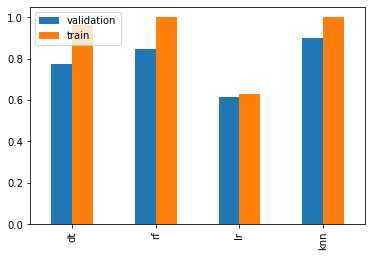

In [64]:
ax = comparison.T.plot.bar()
ax.legend(['validation', 'train'])

### All in One:

In [133]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', None),
])

In [134]:
clfs = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

parameters = {
    'DecisionTreeClassifier': {
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [2, 4, 6, 8, 10, 12]
    },
    'RandomForestClassifier':  {
        'clf__max_features': ['sqrt', 'log2'],
        'clf__n_estimators': [10, 100, 1000]
    },
    'LogisticRegression': [
    {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__penalty': ['l1'], 'clf__solver': ['liblinear']},
    {'clf__C': [0.001, 0.01, 0.1, 1, 10, 50], 'clf__penalty': ['l2'], 'clf__solver': ['lbfgs']},
    ],
    'KNeighborsClassifier': {
        'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'clf__metric': ['euclidean', 'manhattan', 'minkowski'],
        'clf__weights': ['uniform', 'distance']
    }
}

In [136]:
for classifier in clfs:
    
    pipeline.set_params(clf = clfs[classifier])
    cv = GridSearchCV(pipeline, param_grid=parameters[classifier])
    cv.fit(X_train, y_train)
    y_val_pred_knn = cv.predict(X_val)
    y_train_pred_knn = cv.predict(X_train)
    
    print('=============================')
    print(classifier)
    
    print('validation scores:', cv.score(X_val, y_val))
    print('train scores:', cv.score(X_train, y_train))
    print('validation accuracy scores:', accuracy_score(y_val, y_val_pred_knn))
    print('train accuracy scores:', accuracy_score(y_train, y_train_pred_knn))
    print('best parameters:', cv.best_params_)

DecisionTreeClassifier
validation scores: 0.7575
train scores: 0.963125
validation accuracy scores: 0.7575
train accuracy scores: 0.963125
best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 12}
RandomForestClassifier
validation scores: 0.8425
train scores: 1.0
validation accuracy scores: 0.8425
train accuracy scores: 1.0
best parameters: {'clf__max_features': 'log2', 'clf__n_estimators': 100}
LogisticRegression
validation scores: 0.615
train scores: 0.62875
validation accuracy scores: 0.615
train accuracy scores: 0.62875
best parameters: {'clf__C': 1000, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
KNeighborsClassifier
validation scores: 0.9
train scores: 1.0
validation accuracy scores: 0.9
train accuracy scores: 1.0
best parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 4, 'clf__weights': 'distance'}


### Object Oriented Method

In [137]:
import numpy as np

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = self.models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            if type(self.params[key]) == dict:
                for param_key in self.params[key].copy().keys():
                    self.params[key][key+'__'+param_key] = self.params[key].pop(param_key)
            elif type(self.params[key]) == list:
                for ind in range(0,len(self.params[key])):
                    for param_key in self.params[key][ind].copy().keys():
                        self.params[key][ind][key+'__'+param_key] = self.params[key][ind].pop(param_key)
            
            pipeline = Pipeline([
                ('scaler', MinMaxScaler()),
                (key, self.models[key]),
            ])
            gs = GridSearchCV(pipeline, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [856]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models1 = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [857]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='accuracy', n_jobs=2)

Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [858]:
helper1.score_summary(sort_by='max_score')

RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator min_score mean_score max_score std_score  \
1       RandomForestClassifier  0.778261    0.78458  0.795604  0.007823   
0       RandomForestClassifier  0.755056   0.766638   0.78337  0.012119   
7   GradientBoostingClassifier  0.723044    0.73935  0.771429  0.022684   
6   GradientBoostingClassifier  0.725738   0.734477  0.745182  0.008059   
5   GradientBoostingClassifier   0.73251   0.737899  0.740899  0.003818   
4   GradientBoostingClassifier  0.704167   0.721486  0.732632  0.012414   
2           AdaBoostClassifier  0.658174   0.684284  0.705882  0.019736   
3           AdaBoostClassifier  0.668172   0.686944     0.704  0.014677   
9                          SVC  0.520885   0.540547  0.559471  0.015762   
8                          SVC  0.264026    0.32007  0.371681  0.044062   
10                         SVC       0.0        0.0       0.0       0.0   
11                         SVC       0.0        0.0       0.0       0.0   
12                         SVC       0.0        0.0       0.0       0.0   
13                         SVC       0.0        0.0       0.0       0.0   

   RandomForestClassifier__n_estimators AdaBoostClassifier__n_estimators  \
1                                    32                              NaN   
0                                    16                              NaN   
7                                   NaN                              NaN   
6                                   NaN                              NaN   
5                                   NaN                              NaN   
4                                   NaN                              NaN   
2                                   NaN                               16   
3                                   NaN                               32   
9                                   NaN                              NaN   
8                                   NaN                              NaN   
10                                  NaN                              NaN   
11                                  NaN                              NaN   
12                                  NaN                              NaN   
13                                  NaN                              NaN   

   GradientBoostingClassifier__learning_rate  \
1                                        NaN   
0                                        NaN   
7                                        1.0   
6                                        1.0   
5                                        0.8   
4                                        0.8   
2                                        NaN   
3                                        NaN   
9                                        NaN   
8                                        NaN   
10                                       NaN   
11                                       NaN   
12                                       NaN   
13                                       NaN   

   GradientBoostingClassifier__n_estimators SVC__C SVC__kernel SVC__gamma  
1                                       NaN    NaN         NaN        NaN  
0                                       NaN    NaN         NaN        NaN  
7                                        32    NaN         NaN        NaN  
6                                        16    NaN         NaN        NaN  
5                                        32    NaN         NaN        NaN  
4                                        16    NaN         NaN        NaN  
2                                       NaN    NaN         NaN        NaN  
3                                       NaN    NaN         NaN        NaN  
9                                       NaN     10      linear        NaN  
8                                       NaN      1      linear        NaN  
10                                      NaN      1         rbf      0.001  
11                                      NaN      1         rbf     0.0001  
12                                      NaN  

In [973]:
models1 = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

params1 = {
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8, 10, 12]
    },
    'RandomForestClassifier':  {
        'max_features': ['sqrt', 'log2'],
        'n_estimators': [10, 100, 1000]
    },
    'LogisticRegression': [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 50], 'penalty': ['l2'], 'solver': ['lbfgs']},
    ],
    'KNeighborsClassifier': {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'weights': ['uniform', 'distance']
    }
}

In [974]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='f1', n_jobs=2)

Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Running GridSearchCV for KNeighborsClassifier.
Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [975]:
helper1.score_summary(sort_by='max_score')

DecisionTreeClassifier
RandomForestClassifier
LogisticRegression
KNeighborsClassifier


estimator min_score mean_score max_score std_score  \
32  KNeighborsClassifier  0.841889   0.844221   0.84696   0.00209   
74  KNeighborsClassifier  0.841889   0.844221   0.84696   0.00209   
71  KNeighborsClassifier  0.841889   0.844221   0.84696   0.00209   
31  KNeighborsClassifier  0.841889   0.844221   0.84696   0.00209   
34  KNeighborsClassifier  0.841889   0.844221   0.84696   0.00209   
..                   ...       ...        ...       ...       ...   
26    LogisticRegression       0.0   0.010818  0.024291  0.010093   
20    LogisticRegression       0.0   0.002721  0.008163  0.003848   
18    LogisticRegression       0.0        0.0       0.0       0.0   
25    LogisticRegression       0.0        0.0       0.0       0.0   
19    LogisticRegression       0.0        0.0       0.0       0.0   

   DecisionTreeClassifier__criterion DecisionTreeClassifier__max_depth  \
32                               NaN                               NaN   
74                               NaN                               NaN   
71                               NaN                               NaN   
31                               NaN                               NaN   
34                               NaN                               NaN   
..                               ...                               ...   
26                               NaN                               NaN   
20                               NaN                               NaN   
18                               NaN                               NaN   
25                               NaN                               NaN   
19                               NaN                               NaN   

   RandomForestClassifier__max_features RandomForestClassifier__n_estimators  \
32                                  NaN                                  NaN   
74                                  NaN                                  NaN   
71                                  NaN                                  NaN   
31                                  NaN                                  NaN   
34                                  NaN                                  NaN   
..                                  ...                                  ...   
26                                  NaN                                  NaN   
20                                  NaN                                  NaN   
18                                  NaN                                  NaN   
25                                  NaN                                  NaN   
19                                  NaN                                  NaN   

   LogisticRegression__C LogisticRegression__penalty  \
32                   NaN                         NaN   
74                   NaN                         NaN   
71                   NaN                         NaN   
31                   NaN                         NaN   
34                   NaN                         NaN   
..                   ...                         ...   
26                  0.01                          l2   
20                   0.1                          l1   
18                 0.001                          l1   
25                 0.001                          l2   
19                  0.01                          l1   

   LogisticRegression__solver KNeighborsClassifier__metric  \
32                        NaN                    euclidean   
74                        NaN                    minkowski   
71                        NaN                    minkowski   
31                        NaN                    euclidean   
34                        NaN                    euclidean   
..                        ...                          ...   
26                      lbfgs                          NaN   
20                  liblinear                          NaN   
18                  liblinear                          NaN   
25                      lbfgs              

## Model Evaluation

## 5. Predicting The Test Set

In [110]:
testset = pd.read_csv("./data/eeg_test.csv")
X_test = testset

In [107]:
X_test.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4296.41  4040.51  4253.33  4124.10  4341.54  4618.46  4075.38  4601.03   
1  4291.28  3994.36  4247.18  4102.56  4328.21  4616.41  4057.44  4622.56   
2  4299.49  4019.49  4269.74  4116.41  4344.10  4635.38  4067.18  4627.18   
3  4280.00  4004.62  4263.59  4120.51  4323.59  4603.08  4040.51  4589.23   
4  4317.44  3968.72  4260.51  4101.54  4341.54  4600.51  4071.28  4607.69   

        P8       T8      FC6       F4       F8      AF4  
0  4183.59  4204.10  4197.44  4268.72  4598.46  4342.56  
1  4198.46  4227.69  4190.77  4260.51  4593.33  4337.95  
2  4211.28  4233.33  4202.56  4280.51  4596.92  4350.26  
3  4174.87  4212.82  4192.82  4271.79  4608.72  4344.10  
4  4191.28  4231.28  4199.49  4282.05  4592.31  4372.82

In [109]:
prediction_test = pd.Series(pipeline.predict(X_test))
prediction_test

0        0
1        0
2        0
3        0
4        0
        ..
12887    0
12888    0
12889    0
12890    0
12891    0
Length: 12892, dtype: int64

## 6. Sample Kaggle Submission

You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [42]:
sample_kaggle_submission = pd.read_csv("./data/sample_kaggle_submission.csv")

In [44]:
sample_kaggle_submission.head(10)

label
0  0.168801
1  0.124169
2  0.947757
3  0.069585
4  0.635325
5  0.659027
6  0.653697
7  0.850030
8  0.160489
9  0.843272

This is submitted to the [Kaggle competition website](https://www.kaggle.com/t/09885716fbf14eb08cc1cee2c9ebe7cc) to get an evaluation of your predictions on the public leaderboard.

For the report I want you to write a notebook with a scientific description of your analysis. You have to compare the prediction performance of your two best prediction models. This includes data pre-processing, hyperparameter tuning and model evaluation. I also want you to compare the actual predictions made by each model.

To create a new notebook go the "File" in the menu bar and click "New notebook". Do not forget to save your notebook to your GitHub account. You can create as many notebook as you want, but the final report should be in a notebook with the name "Kaggle_eye_blinking_prediciton.ipynb"

You will be evaluated (equal points) on clarity of the report, scientific insight and complexity of the analysis. 